<a href="https://colab.research.google.com/github/DarshanaUOP/colabs-data-analysis/blob/main/ipl_ball_by_ball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pre requisist
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Install findspark: Adds Pyspark to sys.path at runtime
!pip install -q findspark

# Install pyspark
!pip install pyspark


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [52.9 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,077 kB]
Get:13 https://ppa.launchpadcontent.net/d

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pyspark.sql import SparkSession


spark = SparkSession.builder \
    .appName("IPL-2022-dataset") \
    .getOrCreate()

# IPL 2022 dataset
df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/IPL-ball-by-Ball/dataset/ipl_2022_deliveries.csv", header=True, inferSchema=True)
df.createOrReplaceTempView("ipl_2022")
spark.sql("SELECT * FROM ipl_2022").show()

# IPL 2023 dataset
df3 = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/IPL-ball-by-Ball/dataset/ipl_2023_deliveries.csv", header=True, inferSchema=True)
df3.createOrReplaceTempView("ipl_2023")
spark.sql("SELECT * FROM ipl_2023").show()

# IPL 2024 dataset
df3 = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/IPL-ball-by-Ball/dataset/ipl_2024_deliveries.csv", header=True, inferSchema=True)
df3.createOrReplaceTempView("ipl_2024")
spark.sql("SELECT * FROM ipl_2024").show()


+------+------------+--------+--------------------+-------+------------+------------+----+-----------+-------+-------+--------------------+--------------------+--------------------+------------+------------+------------+------------+------------+------------+-----+--------+-----------+------+----+-------+----+-------+-----------+----------------+-----------+-------------+
|season|        date|match_id|               venue|innings|batting_team|bowling_team|over|     bowler|striker|   runs|               speed|        description1|        description2|description3|description4|description5|description6|description7|description8|druns|match_no|runs_of_bat|extras|wide|legbyes|byes|noballs|wicket_type|player_dismissed|extra_druns|off_bat_druns|
+------+------------+--------+--------------------+-------+------------+------------+----+-----------+-------+-------+--------------------+--------------------+--------------------+------------+------------+------------+------------+------------+----

In [4]:
spark.sql("SELECT season,match_id,innings,over,runs,striker FROM ipl_2022 where runs = 1 LIMIT 25").show()

+------+--------+-------+----+----+-----------+
|season|match_id|innings|over|runs|    striker|
+------+--------+-------+----+----+-----------+
|  2022|  202201|      1| 1.3|   1|     Conway|
|  2022|  202201|      1| 2.1|   1|     Conway|
|  2022|  202201|      1| 2.5|   1|    Uthappa|
|  2022|  202201|      1| 3.1|   1|    Uthappa|
|  2022|  202201|      1| 3.3|   1|     Conway|
|  2022|  202201|      1| 4.5|   1|     Rayudu|
|  2022|  202201|      1| 5.1|   1|     Rayudu|
|  2022|  202201|      1| 5.2|   1|    Uthappa|
|  2022|  202201|      1| 6.1|   1|    Uthappa|
|  2022|  202201|      1| 6.2|   1|     Rayudu|
|  2022|  202201|      1| 6.5|   1|    Uthappa|
|  2022|  202201|      1| 7.1|   1|    Uthappa|
|  2022|  202201|      1| 7.5|   1|     Rayudu|
|  2022|  202201|      1| 7.6|   1|     Jadeja|
|  2022|  202201|      1| 8.1|   1|     Jadeja|
|  2022|  202201|      1| 8.3|   1|     Rayudu|
|  2022|  202201|      1| 8.5|   1|     Jadeja|
|  2022|  202201|      1| 9.2|   1|     

Distinct runs understand in dataset

In [5]:
spark.sql("SELECT DISTINCT runs , count(runs) from ipl_2022 GROUP BY runs ORDER BY runs ASC").show()

+--------------------+-----------+
|                runs|count(runs)|
+--------------------+-----------+
|                   0|       5469|
|                   1|       6347|
|                   2|       1017|
|                   3|         58|
|                   4|       2011|
|50-run stand up b...|          1|
|                   6|       1056|
|                byes|         33|
|from round the wi...|          1|
|            leg byes|        242|
|             no ball|         72|
|                 out|        903|
|                wide|        701|
|wide out Stumped!...|          1|
+--------------------+-----------+



OFF BAT RUNS

In [6]:
spark.sql("SELECT DISTINCT off_bat_druns, COUNT(off_bat_druns) AS run_count , off_bat_druns * run_count AS total_runs from ipl_2022 GROUP BY off_bat_druns ORDER BY off_bat_druns ASC").show()

+-------------+---------+----------+
|off_bat_druns|run_count|total_runs|
+-------------+---------+----------+
|            0|     7368|         0|
|            1|     6383|      6383|
|            2|     1021|      2042|
|            3|       58|       174|
|            4|     2020|      8080|
|            6|     1062|      6372|
+-------------+---------+----------+



EXTRAS

In [7]:
spark.sql("SELECT DISTINCT extra_druns , count(extra_druns) AS run_count , (extra_druns*run_count) AS total_runs from ipl_2022 GROUP BY extra_druns ORDER BY extra_druns ASC").show()

+-----------+---------+----------+
|extra_druns|run_count|total_runs|
+-----------+---------+----------+
|          0|    16861|         0|
|          1|      943|       943|
|          2|       33|        66|
|          3|        1|         3|
|          4|       38|       152|
|          5|       36|       180|
+-----------+---------+----------+



In [8]:
spark.sql("SELECT COUNT(DISTINCT match_id) FROM ipl_2022").show()

+------------------------+
|count(DISTINCT match_id)|
+------------------------+
|                      74|
+------------------------+



separate runs by category

In [9]:
spark.sql("SELECT match_id, innings, off_bat_druns  , COUNT(off_bat_druns) AS ball_count , (ball_count*off_bat_druns) AS collected_runs \
FROM ipl_2022 \
GROUP BY match_id, innings, off_bat_druns \
ORDER BY match_id, innings, off_bat_druns").show()

+--------+-------+-------------+----------+--------------+
|match_id|innings|off_bat_druns|ball_count|collected_runs|
+--------+-------+-------------+----------+--------------+
|  202201|      1|            0|        60|             0|
|  202201|      1|            1|        47|            47|
|  202201|      1|            2|         4|             8|
|  202201|      1|            4|        10|            40|
|  202201|      1|            6|         5|            30|
|  202201|      2|            0|        43|             0|
|  202201|      2|            1|        43|            43|
|  202201|      2|            2|        10|            20|
|  202201|      2|            4|        12|            48|
|  202201|      2|            6|         3|            18|
|  202202|      1|            0|        40|             0|
|  202202|      1|            1|        50|            50|
|  202202|      1|            2|         8|            16|
|  202202|      1|            4|        18|            7

In [10]:
spark.sql("SELECT match_id, over, extra_druns, off_bat_druns , (extra_druns + off_bat_druns) AS run FROM ipl_2022 \
").show()

+--------+----+-----------+-------------+---+
|match_id|over|extra_druns|off_bat_druns|run|
+--------+----+-----------+-------------+---+
|  202201| 0.1|          1|            0|  1|
|  202201| 0.1|          0|            0|  0|
|  202201| 0.2|          1|            0|  1|
|  202201| 0.2|          0|            0|  0|
|  202201| 0.3|          0|            0|  0|
|  202201| 0.4|          1|            0|  1|
|  202201| 0.4|          0|            0|  0|
|  202201| 0.5|          0|            0|  0|
|  202201| 0.6|          0|            0|  0|
|  202201| 1.1|          0|            0|  0|
|  202201| 1.2|          0|            0|  0|
|  202201| 1.3|          0|            1|  1|
|  202201| 1.4|          0|            4|  4|
|  202201| 1.5|          0|            0|  0|
|  202201| 1.6|          0|            0|  0|
|  202201| 2.1|          0|            1|  1|
|  202201| 2.2|          0|            6|  6|
|  202201| 2.3|          0|            0|  0|
|  202201| 2.4|          0|       

In [11]:
spark.sql("SELECT (extra_druns + off_bat_druns) AS run, COUNT(*) AS number_of_balls, (number_of_balls*run) AS score_colleted FROM ipl_2022 GROUP BY run ORDER BY run").show()

spark.sql("SELECT (extras + runs_of_bat) AS run, COUNT(*) AS number_of_balls, (number_of_balls*run) AS score_colleted FROM ipl_2023 GROUP BY run ORDER BY run").show()

spark.sql("SELECT (extras + runs_of_bat) AS run, COUNT(*) AS number_of_balls, (number_of_balls*run) AS score_colleted FROM ipl_2024 GROUP BY run ORDER BY run").show()

+---+---------------+--------------+
|run|number_of_balls|score_colleted|
+---+---------------+--------------+
|  0|           6355|             0|
|  1|           7267|          7267|
|  2|           1072|          2144|
|  3|             62|           186|
|  4|           2049|          8196|
|  5|             45|           225|
|  6|           1057|          6342|
|  7|              5|            35|
+---+---------------+--------------+

+---+---------------+--------------+
|run|number_of_balls|score_colleted|
+---+---------------+--------------+
|  0|           5817|             0|
|  1|           7476|          7476|
|  2|           1158|          2316|
|  3|             53|           159|
|  4|           2196|          8784|
|  5|             39|           195|
|  6|           1110|          6660|
|  7|             14|            98|
+---+---------------+--------------+

+---+---------------+--------------+
|run|number_of_balls|score_colleted|
+---+---------------+--------------+

Number of balls per each run

In [12]:
spark.sql("SELECT COUNT(*) AS total_bals FROM ipl_2024").show()
spark.sql("SELECT \
  (extras + runs_of_bat) AS run,\
  COUNT(*) AS number_of_balls, \
  ROUND(((number_of_balls/(SELECT COUNT(*) AS total_bals FROM ipl_2024))*100),2) AS bals_percentage, \
  (number_of_balls*run) AS score_colleted \
FROM ipl_2024 \
GROUP BY run \
ORDER BY run").show()

+----------+
|total_bals|
+----------+
|     10750|
+----------+

+---+---------------+---------------+--------------+
|run|number_of_balls|bals_percentage|score_colleted|
+---+---------------+---------------+--------------+
|  0|           3280|          30.51|             0|
|  1|           4489|          41.76|          4489|
|  2|            728|           6.77|          1456|
|  3|             21|            0.2|            63|
|  4|           1390|          12.93|          5560|
|  5|             28|           0.26|           140|
|  6|            806|            7.5|          4836|
|  7|              8|           0.07|            56|
+---+---------------+---------------+--------------+



Balls used percentage for each year

In [13]:
spark.sql("SELECT \
  (extras + runs_of_bat) AS run,\
  COUNT(*) AS number_of_balls, \
  ROUND(((number_of_balls/(SELECT COUNT(*) AS total_bals FROM ipl_2022))*100),2) AS bals_percentage, \
  (number_of_balls*run) AS score_colleted \
FROM ipl_2022 \
GROUP BY run \
ORDER BY run").show()

spark.sql("SELECT \
  (extras + runs_of_bat) AS run,\
  COUNT(*) AS number_of_balls, \
  ROUND(((number_of_balls/(SELECT COUNT(*) AS total_bals FROM ipl_2023))*100),2) AS bals_percentage, \
  (number_of_balls*run) AS score_colleted \
FROM ipl_2023 \
GROUP BY run \
ORDER BY run").show()

spark.sql("SELECT \
  (extras + runs_of_bat) AS run,\
  COUNT(*) AS number_of_balls, \
  ROUND(((number_of_balls/(SELECT COUNT(*) AS total_bals FROM ipl_2024))*100),2) AS bals_percentage, \
  (number_of_balls*run) AS score_colleted \
FROM ipl_2024 \
GROUP BY run \
ORDER BY run").show()

+---+---------------+---------------+--------------+
|run|number_of_balls|bals_percentage|score_colleted|
+---+---------------+---------------+--------------+
|  0|           6355|          35.48|             0|
|  1|           7267|          40.57|          7267|
|  2|           1072|           5.98|          2144|
|  3|             62|           0.35|           186|
|  4|           2049|          11.44|          8196|
|  5|             45|           0.25|           225|
|  6|           1057|            5.9|          6342|
|  7|              5|           0.03|            35|
+---+---------------+---------------+--------------+

+---+---------------+---------------+--------------+
|run|number_of_balls|bals_percentage|score_colleted|
+---+---------------+---------------+--------------+
|  0|           5817|          32.56|             0|
|  1|           7476|          41.85|          7476|
|  2|           1158|           6.48|          2316|
|  3|             53|            0.3|        

Combined results

In [14]:
spark.sql("SELECT \
    run, \
    SUM(number_of_balls_2022) AS number_of_balls_2022, \
    AVG(bals_percentage_2022) AS bals_percentage_2022, \
    SUM(score_collected_2022) AS total_score_collected_2022, \
    SUM(number_of_balls_2023) AS number_of_balls_2023, \
    AVG(bals_percentage_2023) AS bals_percentage_2023, \
    SUM(score_collected_2023) AS total_score_collected_2023, \
    SUM(number_of_balls_2024) AS number_of_balls_2024, \
    AVG(bals_percentage_2024) AS bals_percentage_2024, \
    SUM(score_collected_2024) AS total_score_collected_2024 \
FROM ( \
    SELECT \
        (extras + runs_of_bat) AS run, \
        COUNT(*) AS number_of_balls_2022, \
        ROUND(((COUNT(*) / (SELECT COUNT(*) FROM ipl_2022)) * 100), 2) AS bals_percentage_2022, \
        (COUNT(*) * (extras + runs_of_bat)) AS score_collected_2022, \
        NULL AS number_of_balls_2023, \
        NULL AS bals_percentage_2023, \
        NULL AS score_collected_2023, \
        NULL AS number_of_balls_2024, \
        NULL AS bals_percentage_2024, \
        NULL AS score_collected_2024 \
    FROM \
        ipl_2022 \
    GROUP BY \
        run \
    UNION ALL \
    SELECT \
        (extras + runs_of_bat) AS run, \
        NULL AS number_of_balls_2022, \
        NULL AS bals_percentage_2022, \
        NULL AS score_collected_2022, \
        COUNT(*) AS number_of_balls_2023, \
        ROUND(((COUNT(*) / (SELECT COUNT(*) FROM ipl_2023)) * 100), 2) AS bals_percentage_2023, \
        (COUNT(*) * (extras + runs_of_bat)) AS score_collected_2023, \
        NULL AS number_of_balls_2024, \
        NULL AS bals_percentage_2024, \
        NULL AS score_collected_2024 \
    FROM \
        ipl_2023 \
    GROUP BY \
        run \
    UNION ALL \
    SELECT \
        (extras + runs_of_bat) AS run, \
        NULL AS number_of_balls_2022, \
        NULL AS bals_percentage_2022, \
        NULL AS score_collected_2022, \
        NULL AS number_of_balls_2023, \
        NULL AS bals_percentage_2023, \
        NULL AS score_collected_2023, \
        COUNT(*) AS number_of_balls_2024, \
        ROUND(((COUNT(*) / (SELECT COUNT(*) FROM ipl_2024)) * 100), 2) AS bals_percentage_2024, \
        (COUNT(*) * (extras + runs_of_bat)) AS score_collected_2024 \
    FROM \
        ipl_2024 \
    GROUP BY \
        run \
) AS combined_results \
GROUP BY \
    run \
ORDER BY \
    run;\
").show()


+---+--------------------+--------------------+--------------------------+--------------------+--------------------+--------------------------+--------------------+--------------------+--------------------------+
|run|number_of_balls_2022|bals_percentage_2022|total_score_collected_2022|number_of_balls_2023|bals_percentage_2023|total_score_collected_2023|number_of_balls_2024|bals_percentage_2024|total_score_collected_2024|
+---+--------------------+--------------------+--------------------------+--------------------+--------------------+--------------------------+--------------------+--------------------+--------------------------+
|  0|                6355|               35.48|                         0|                5817|               32.56|                         0|                3280|               30.51|                         0|
|  1|                7267|               40.57|                      7267|                7476|               41.85|                      7476|     

Customized Query

In [15]:
spark.sql("SELECT \
    run, \
    AVG(bals_percentage_2022) AS bals_percentage_2022, \
    AVG(bals_percentage_2023) AS bals_percentage_2023, \
    AVG(bals_percentage_2024) AS bals_percentage_2024 \
FROM ( \
    SELECT \
        (extras + runs_of_bat) AS run, \
        COUNT(*) AS number_of_balls_2022, \
        ROUND(((COUNT(*) / (SELECT COUNT(*) FROM ipl_2022)) * 100), 2) AS bals_percentage_2022, \
        (COUNT(*) * (extras + runs_of_bat)) AS score_collected_2022, \
        NULL AS number_of_balls_2023, \
        NULL AS bals_percentage_2023, \
        NULL AS score_collected_2023, \
        NULL AS number_of_balls_2024, \
        NULL AS bals_percentage_2024, \
        NULL AS score_collected_2024 \
    FROM \
        ipl_2022 \
    GROUP BY \
        run \
    UNION ALL \
    SELECT \
        (extras + runs_of_bat) AS run, \
        NULL AS number_of_balls_2022, \
        NULL AS bals_percentage_2022, \
        NULL AS score_collected_2022, \
        COUNT(*) AS number_of_balls_2023, \
        ROUND(((COUNT(*) / (SELECT COUNT(*) FROM ipl_2023)) * 100), 2) AS bals_percentage_2023, \
        (COUNT(*) * (extras + runs_of_bat)) AS score_collected_2023, \
        NULL AS number_of_balls_2024, \
        NULL AS bals_percentage_2024, \
        NULL AS score_collected_2024 \
    FROM \
        ipl_2023 \
    GROUP BY \
        run \
    UNION ALL \
    SELECT \
        (extras + runs_of_bat) AS run, \
        NULL AS number_of_balls_2022, \
        NULL AS bals_percentage_2022, \
        NULL AS score_collected_2022, \
        NULL AS number_of_balls_2023, \
        NULL AS bals_percentage_2023, \
        NULL AS score_collected_2023, \
        COUNT(*) AS number_of_balls_2024, \
        ROUND(((COUNT(*) / (SELECT COUNT(*) FROM ipl_2024)) * 100), 2) AS bals_percentage_2024, \
        (COUNT(*) * (extras + runs_of_bat)) AS score_collected_2024 \
    FROM \
        ipl_2024 \
    GROUP BY \
        run \
) AS combined_results \
GROUP BY \
    run \
ORDER BY \
    run;\
").show()


+---+--------------------+--------------------+--------------------+
|run|bals_percentage_2022|bals_percentage_2023|bals_percentage_2024|
+---+--------------------+--------------------+--------------------+
|  0|               35.48|               32.56|               30.51|
|  1|               40.57|               41.85|               41.76|
|  2|                5.98|                6.48|                6.77|
|  3|                0.35|                 0.3|                 0.2|
|  4|               11.44|               12.29|               12.93|
|  5|                0.25|                0.22|                0.26|
|  6|                 5.9|                6.21|                 7.5|
|  7|                0.03|                0.08|                0.07|
+---+--------------------+--------------------+--------------------+



Add matplotlib

example bar chart

Use spark.sql results

In [16]:
result = spark.sql("SELECT \
    run, \
    AVG(bals_percentage_2022) AS bals_percentage_2022, \
    AVG(bals_percentage_2023) AS bals_percentage_2023, \
    AVG(bals_percentage_2024) AS bals_percentage_2024 \
FROM ( \
    SELECT \
        (extras + runs_of_bat) AS run, \
        COUNT(*) AS number_of_balls_2022, \
        ROUND(((COUNT(*) / (SELECT COUNT(*) FROM ipl_2022)) * 100), 2) AS bals_percentage_2022, \
        (COUNT(*) * (extras + runs_of_bat)) AS score_collected_2022, \
        NULL AS number_of_balls_2023, \
        NULL AS bals_percentage_2023, \
        NULL AS score_collected_2023, \
        NULL AS number_of_balls_2024, \
        NULL AS bals_percentage_2024, \
        NULL AS score_collected_2024 \
    FROM \
        ipl_2022 \
    GROUP BY \
        run \
    UNION ALL \
    SELECT \
        (extras + runs_of_bat) AS run, \
        NULL AS number_of_balls_2022, \
        NULL AS bals_percentage_2022, \
        NULL AS score_collected_2022, \
        COUNT(*) AS number_of_balls_2023, \
        ROUND(((COUNT(*) / (SELECT COUNT(*) FROM ipl_2023)) * 100), 2) AS bals_percentage_2023, \
        (COUNT(*) * (extras + runs_of_bat)) AS score_collected_2023, \
        NULL AS number_of_balls_2024, \
        NULL AS bals_percentage_2024, \
        NULL AS score_collected_2024 \
    FROM \
        ipl_2023 \
    GROUP BY \
        run \
    UNION ALL \
    SELECT \
        (extras + runs_of_bat) AS run, \
        NULL AS number_of_balls_2022, \
        NULL AS bals_percentage_2022, \
        NULL AS score_collected_2022, \
        NULL AS number_of_balls_2023, \
        NULL AS bals_percentage_2023, \
        NULL AS score_collected_2023, \
        COUNT(*) AS number_of_balls_2024, \
        ROUND(((COUNT(*) / (SELECT COUNT(*) FROM ipl_2024)) * 100), 2) AS bals_percentage_2024, \
        (COUNT(*) * (extras + runs_of_bat)) AS score_collected_2024 \
    FROM \
        ipl_2024 \
    GROUP BY \
        run \
) AS combined_results \
GROUP BY \
    run \
ORDER BY \
    run;\
").collect()

In [17]:
years = ['2022', '2023', '2024']
result

[Row(run=0, bals_percentage_2022=35.48, bals_percentage_2023=32.56, bals_percentage_2024=30.51),
 Row(run=1, bals_percentage_2022=40.57, bals_percentage_2023=41.85, bals_percentage_2024=41.76),
 Row(run=2, bals_percentage_2022=5.98, bals_percentage_2023=6.48, bals_percentage_2024=6.77),
 Row(run=3, bals_percentage_2022=0.35, bals_percentage_2023=0.3, bals_percentage_2024=0.2),
 Row(run=4, bals_percentage_2022=11.44, bals_percentage_2023=12.29, bals_percentage_2024=12.93),
 Row(run=5, bals_percentage_2022=0.25, bals_percentage_2023=0.22, bals_percentage_2024=0.26),
 Row(run=6, bals_percentage_2022=5.9, bals_percentage_2023=6.21, bals_percentage_2024=7.5),
 Row(run=7, bals_percentage_2022=0.03, bals_percentage_2023=0.08, bals_percentage_2024=0.07)]

# This is an extraction of each scores. it shows that the frequency of getting a boundary have increased.

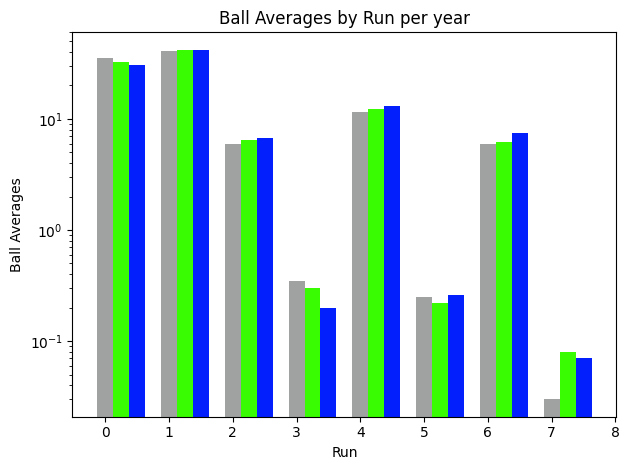

In [18]:
import matplotlib.pyplot as plt
import math

colors = ['#9fa2a1', '#39fc03', '#0320fc']  # Red, Green, Blue
width = 0.25

for runs in result:
  run_score = runs[0]
  for i in range(len(years)):
    year = years[i]
    plt.bar((run_score + width * i),
            # math.log(runs[i+1]*100),
            (runs[i+1]),
            width,
            label = year,
            color = colors[i % len(colors)])

plt.xlabel('Run')
plt.ylabel('Ball Averages')
plt.title('Ball Averages by Run per year')
plt.yscale('log')
# plt.xticks(index + bar_width, years)
# plt.legend()
# plt.grid(True, which="both", linestyle='-.')

plt.tight_layout()
plt.show()